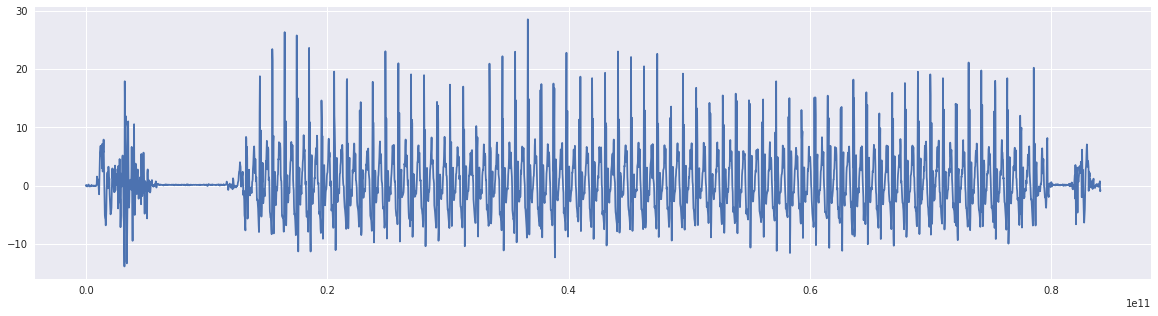

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy import signal
import seaborn
from scipy.integrate import simps
from scipy.integrate import trapz
from scipy.signal import resample
from statsmodels.nonparametric.smoothers_lowess import lowess
from find_cutoff import*


seaborn.set()
# filename = sys.argv[1]
flag = 'app'
if (flag == 'sam'):
    filename = 'android_datasets/cailpocketwalk-lac.csv'
    data = pd.read_csv(filename)
else:
    filename = 'iphone_datasets/100walkpocketeastlac-lac.csv'
    data = pd.read_csv(filename)
    data = data.rename(columns={'time_tick': 'time', 'lac_X_value':'ax', 'lac_Y_value':'ay', 'lac_Z_value':'az'})


data['time'] = pd.to_timedelta(data['time'], unit='s')
data = data.set_index('time')
data['total'] = np.sqrt(data['ax']**2 + data['ay']**2 + data['az']**2)
plt.figure(figsize=(20,5))
plt.plot(data['ay'])
plt.show()


/home/kasra/318/318-project/find_cutoff.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dfl['dif'] = (dfl['filtered'] - middle).abs()
/home/kasra/318/318-project/find_cutoff.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dfr['dif'] = (dfr['filtered'] - middle).abs()


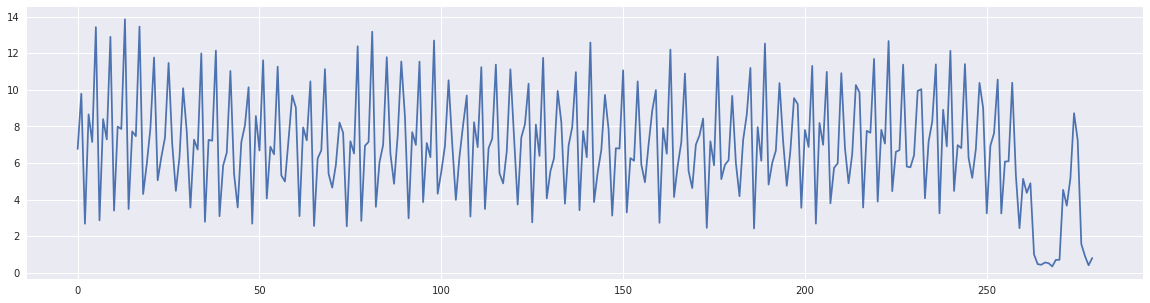

(2,)

In [5]:
cut_data = find_cutoff_time(data)
resampled = cut_data.resample(".25S").mean()


# plt.figure(figsize=(20,5))
# plt.plot(cut_data)
# plt.show

low_pass_acc = lowess(resampled['total'], resampled.index, frac=.001)
median = np.median(low_pass_acc[:,1])

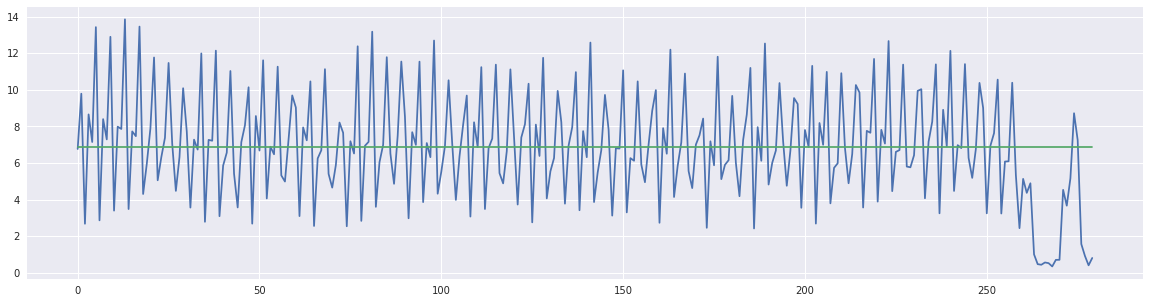

6.8707045521595971

In [6]:
# interpol = np.interp([:,0],low_pass_acc[:,0], low_pass_acc[:,1]) 

plt.figure(figsize=(20,5))
plt.plot(low_pass_acc[:,1])
plt.plot(np.repeat(median, low_pass_acc[:,1].shape))
plt.show()
median

In [7]:
steps = low_pass_acc[np.isclose(low_pass_acc, median, rtol=median*.1)].shape
steps[0]/2


124.0

In [ ]:
low_pass_acc.shape